<div style="text-align:center">
    <h1><b>PROJECT PENGOLAHAN CITRA DIGITAL</b></h1>
    <h1><b>TRAFFIC-VISION (Sistem Pintar Deteksi Lampu Lalu Lintas)</b></h1>
</div>
<br><br>
<br><br>
<table style="width:100%;">
    <tr>
        <td align="center">
            <img src="dataset_kelompok_1/UNRAM-LOGO-FIX-STATUTA-.jpg" alt="Foto" width="500" height="500">
        </td>
    </tr>
</table>
<br><br>
<br><br>
<div style="text-align:center">
    <h2>Disusun Oleh:</h2>
    <h2>APRILIANINGSIH (F1D022003)</h2>
    <h2>ALDA DWI APRISAGITA (F1D022032)</h2>
    <h2>INDIRA FELISTA SANIS SUPARSA (F1D022054)<h2>
    <h2>HENDRA AHMAD YANI (F1D022122)</h2>
    <h2>MUHAMMAD FIQRI JORDY ARDIANTO (F1D022145)</h2>
</div>
<br><br><br><br>
<br><br><br><br>
<div style="text-align:center">
    <h2>UNIVERSITAS MATARAM</h2>
    <h2>FAKULTAS TEKNIK</h2>
    <h2>TEKNIK INFORMATIKA</h2>
    <h2>2024/2025</h2>
</div>
<br><br><br><br>
<br><br><br><br>
<br><br><br><br>
<br><br><br><br>


## LATAR BELAKANG

Program deteksi lampu lalu lintas ini dibuat sebagai respons terhadap kasus kecelakaan yang sering terjadi karena orang buta warna kesulitan dalam membaca atau melihat lampu lalu lintas. Orang buta warna tidak dapat membedakan warna dengan jelas, seperti warna merah, kuning, dan hijau pada lampu lalu lintas, yang merupakan informasi vital untuk menentukan kapan harus berhenti, siap, atau melanjutkan perjalanan.

Kecelakaan yang melibatkan orang buta warna seringkali terjadi karena kesulitan mereka dalam memahami perubahan warna lampu lalu lintas, yang dapat mengakibatkan tindakan yang tidak tepat saat berada di persimpangan atau melintas jalan. Hal ini mengundang kebutuhan akan solusi teknologi yang dapat membantu orang buta warna mengidentifikasi dan merespons lampu lalu lintas dengan tepat.

Program deteksi lampu lalu lintas ini dirancang untuk memproses gambar dari kamera atau sumber visual lainnya, kemudian menganalisisnya untuk mengenali warna dari lampu lalu lintas. Proses ini melibatkan beberapa tahapan, seperti pengolahan gambar (resize, penghapusan noise, peningkatan kontras, normalisasi intensitas, segmentasi warna), ekstraksi fitur (menghitung rata-rata warna, histogram warna), dan akhirnya menggunakan model machine learning (K-Nearest Neighbors, Random Forest, SVM) untuk melakukan klasifikasi warna lampu lalu lintas.

Dengan memanfaatkan teknologi ini, diharapkan orang buta warna dapat menerima informasi yang lebih jelas dan akurat tentang status lampu lalu lintas di sekitar mereka, mengurangi risiko kecelakaan dan meningkatkan keselamatan mereka saat berada di jalan. Program ini juga dapat memberikan bantuan tambahan bagi pengemudi atau pejalan kaki yang membutuhkan informasi visual yang lebih presisi dalam menavigasi lalu lintas perkotaan.

## IMPORT LIBRARY

In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import random
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score

Penjelasan rinci mengenai mengapa setiap pustaka atau modul yang diimpor diperlukan dalam proyek klasifikasi lampu lalu lintas:

### OpenCV (cv2)
- **Fungsi:** OpenCV (Open Source Computer Vision Library) adalah pustaka yang digunakan untuk pengolahan gambar dan video. Pustaka ini menyediakan berbagai fungsi untuk membaca, memproses, dan menampilkan gambar.
- **Mengapa Diperlukan:** Dalam proyek ini, OpenCV digunakan untuk membaca gambar dari direktori, mengubah ukuran gambar, melakukan augmentasi gambar (rotasi, flipping), menghilangkan noise (Gaussian Blur), meningkatkan kontras, segmentasi warna, dan lain-lain. OpenCV juga digunakan untuk konversi warna dan berbagai operasi pengolahan gambar lainnya.

### NumPy (numpy)
- **Fungsi:** NumPy adalah pustaka yang digunakan untuk komputasi numerik di Python. Pustaka ini menyediakan dukungan untuk array dan matriks besar serta fungsi matematika tingkat tinggi untuk operasi pada array ini.
- **Mengapa Diperlukan:** Dalam proyek ini, NumPy digunakan untuk berbagai operasi numerik seperti manipulasi array, perhitungan statistik, operasi aritmetika, dan sebagainya. Banyak fungsi pengolahan gambar dan data augmentation menggunakan array NumPy untuk efisiensi dan kecepatan.

### Matplotlib (matplotlib.pyplot)
- **Fungsi:** Matplotlib adalah pustaka untuk membuat visualisasi data di Python. `pyplot` adalah modul dalam Matplotlib yang menyediakan antarmuka seperti MATLAB untuk membuat plot dan grafik.
- **Mengapa Diperlukan:** Dalam proyek ini, Matplotlib digunakan untuk menampilkan distribusi data dalam bentuk histogram, menampilkan contoh gambar dari dataset, dan visualisasi hasil evaluasi model seperti matriks kebingungan (confusion matrix).

### OS (os)
- **Fungsi:** OS adalah pustaka standar Python yang menyediakan fungsi untuk berinteraksi dengan sistem operasi, seperti bekerja dengan sistem file.
- **Mengapa Diperlukan:** Dalam proyek ini, OS digunakan untuk mengakses direktori dan file, membaca nama file dari direktori, membangun path untuk file, dan lain-lain.

### Random (random)
- **Fungsi:** Random adalah pustaka standar Python yang digunakan untuk menghasilkan angka acak dan melakukan operasi acak lainnya.
- **Mengapa Diperlukan:** Dalam proyek ini, Random digunakan untuk memilih sampel acak dari dataset untuk ditampilkan sebagai contoh gambar.

### Pandas (pandas)
- **Fungsi:** Pandas adalah pustaka yang digunakan untuk manipulasi dan analisis data, khususnya untuk data yang berformat tabel (data frame).
- **Mengapa Diperlukan:** Dalam proyek ini, Pandas digunakan untuk analisis data dan manipulasi data, seperti memproses label dan fitur data sebelum membagi dataset menjadi set pelatihan dan pengujian.

### Seaborn (seaborn)
- **Fungsi:** Seaborn adalah pustaka untuk visualisasi data yang dibangun di atas Matplotlib. Pustaka ini menyediakan antarmuka tingkat tinggi untuk menggambar grafik statistik yang menarik.
- **Mengapa Diperlukan:** Dalam proyek ini, Seaborn digunakan untuk visualisasi lanjutan seperti plot matriks kebingungan yang lebih menarik dan informatif.

### Scikit-learn (sklearn)
#### Model Selection
```python
from sklearn.model_selection import train_test_split
```
- **Fungsi:** Modul ini menyediakan fungsi untuk membagi dataset menjadi set pelatihan dan set pengujian.
- **Mengapa Diperlukan:** Dalam proyek ini, `train_test_split` digunakan untuk membagi dataset menjadi dua bagian: satu untuk melatih model dan satu lagi untuk menguji performa model.

#### Preprocessing
```python
from sklearn.preprocessing import StandardScaler
```
- **Fungsi:** Modul ini menyediakan berbagai alat untuk preprocessing data, seperti standarisasi fitur.
- **Mengapa Diperlukan:** Dalam proyek ini, `StandardScaler` digunakan untuk menstandarisasi fitur sebelum melatih model. Standarisasi memastikan bahwa setiap fitur memiliki skala yang sama, yang penting untuk algoritma pembelajaran mesin tertentu.

#### KNN Classifier
```python
from sklearn.neighbors import KNeighborsClassifier
```
- **Fungsi:** Modul ini menyediakan implementasi dari algoritma K-Nearest Neighbors (KNN) untuk klasifikasi.
- **Mengapa Diperlukan:** Dalam proyek ini, `KNeighborsClassifier` digunakan untuk melatih model KNN sebagai salah satu model klasifikasi yang diuji.

#### Random Forest Classifier
```python
from sklearn.ensemble import RandomForestClassifier
```
- **Fungsi:** Modul ini menyediakan implementasi dari algoritma Random Forest untuk klasifikasi.
- **Mengapa Diperlukan:** Dalam proyek ini, `RandomForestClassifier` digunakan untuk melatih model Random Forest sebagai salah satu model klasifikasi yang diuji.

#### Support Vector Classifier
```python
from sklearn.svm import SVC
```
- **Fungsi:** Modul ini menyediakan implementasi dari Support Vector Machine (SVM) untuk klasifikasi.
- **Mengapa Diperlukan:** Dalam proyek ini, `SVC` digunakan untuk melatih model SVM sebagai salah satu model klasifikasi yang diuji.

#### Metrics
```python
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
```
- **Fungsi:** Modul ini menyediakan berbagai alat untuk mengevaluasi performa model, termasuk matriks kebingungan dan berbagai metrik evaluasi seperti presisi, recall, F1 score, dan akurasi.
- **Mengapa Diperlukan:** Dalam proyek ini, metrik evaluasi ini digunakan untuk mengukur dan membandingkan performa model klasifikasi yang berbeda, sehingga kita dapat memilih model terbaik berdasarkan hasil evaluasi tersebut.

Setiap pustaka dan modul yang diimpor memiliki peran penting dalam keseluruhan proses pengolahan data, pelatihan model, dan evaluasi model dalam proyek klasifikasi lampu lalu lintas ini.

## DATA LOADING

Kode ini digunakan untuk mempersiapkan dan menganalisis data gambar lampu lalu lintas yang digunakan dalam proses klasifikasi. Pertama, fungsi `importImage(path, label)` digunakan untuk memuat gambar dari direktori tertentu (`path`) dan memberikan label (`label`) pada setiap gambar. Ini dilakukan dengan membaca setiap file gambar menggunakan OpenCV (`cv2.imread`) dan menyimpannya bersama dengan labelnya dalam bentuk tuple.

Setelah memuat gambar untuk setiap kategori lampu lalu lintas (`stop`, `ready`, `go`), semua gambar digabungkan menjadi satu daftar (`all_images`). Langkah ini penting untuk mempersiapkan data sebelum analisis lebih lanjut.

Kemudian, fungsi `displayDataDistributionAndSamples(images)` digunakan untuk menganalisis distribusi data gambar. Pertama, kode ini menghitung jumlah gambar untuk setiap label (`stop`, `ready`, `go`) dan menampilkan distribusi tersebut dalam bentuk histogram menggunakan matplotlib (`plt.bar`). Hal ini membantu untuk memahami seberapa seimbang atau tidak seimbangnya jumlah gambar dalam setiap kategori.

Selanjutnya, kode juga menampilkan sampel gambar dari setiap kategori untuk memberikan gambaran visual tentang variasi gambar yang ada. Dalam hal ini, dua sampel gambar pertama dari setiap kategori ditampilkan dengan judul sesuai dengan labelnya (`stop`, `ready`, `go`). Ini membantu dalam memeriksa keberagaman gambar dan memastikan representasi yang baik dari setiap kategori sebelum melangkah lebih jauh dalam proses klasifikasi.

Secara keseluruhan, kode ini berfungsi sebagai langkah awal dalam analisis dan persiapan data untuk klasifikasi lampu lalu lintas. Dengan memuat, menggabungkan, dan menganalisis distribusi serta sampel data gambar, dapat memastikan bahwa data yang digunakan untuk melatih dan menguji model klasifikasi adalah representatif dan siap untuk digunakan.

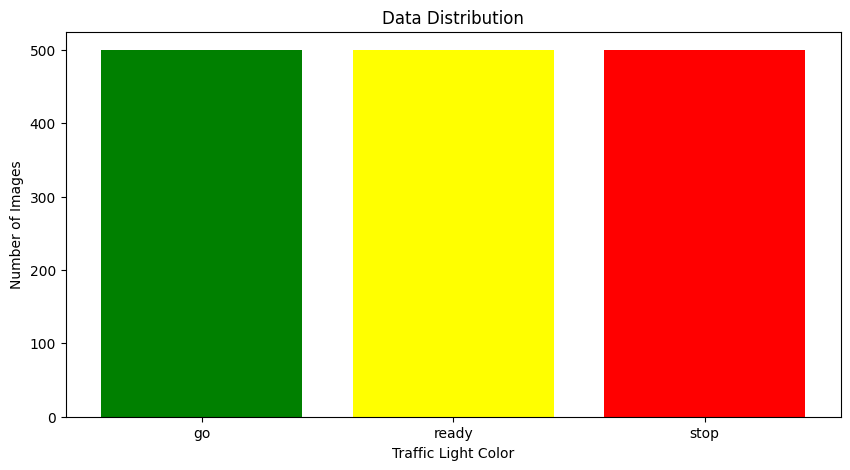

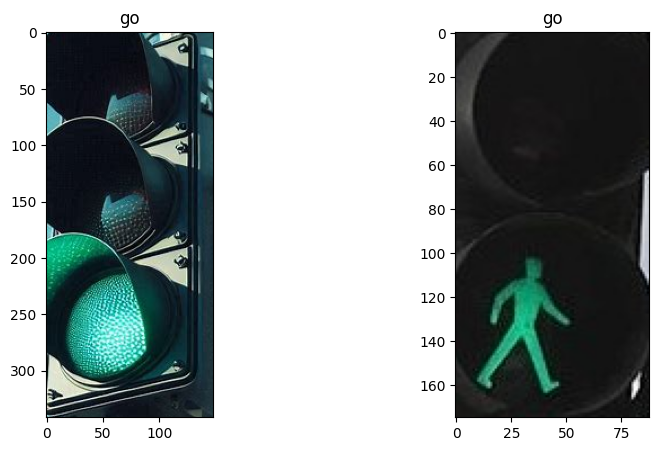

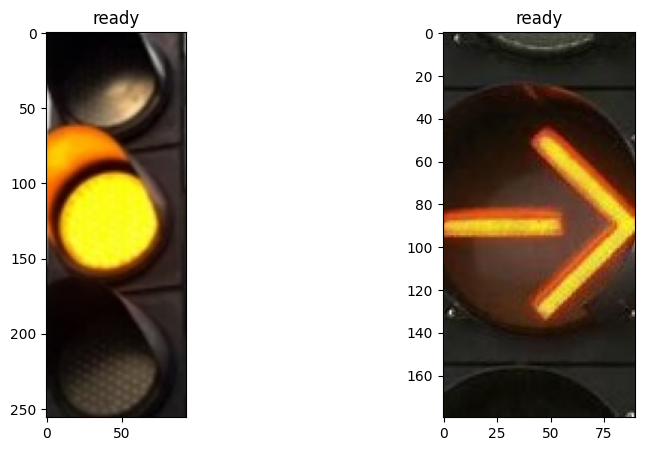

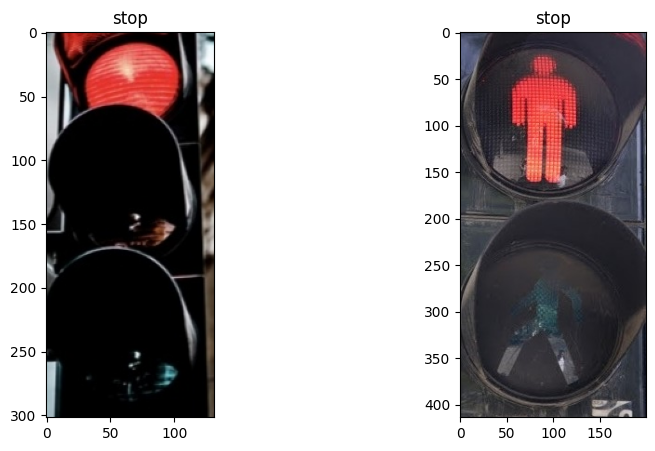

In [2]:
# Data Loading
def importImage(path, label):
    images = []
    file_names = os.listdir(path)
    for file_name in file_names:
        file_path = os.path.join(path, file_name)
        image = cv2.imread(file_path)
        images.append((image, label))
    return images

# Load images
imageRed = importImage("dataset_kelompok_1/training/stop", "stop")
imageYellow = importImage("dataset_kelompok_1/training/ready", "ready")
imageGreen = importImage("dataset_kelompok_1/training/go", "go")

# menggabungkan semua images
all_images = imageRed + imageYellow + imageGreen

# menampilkan distrribusi data dan sampel images
def displayDataDistributionAndSamples(images):
    labels = [image[1] for image in images]
    unique_labels, counts = np.unique(labels, return_counts=True)

    # distribusi data
    plt.figure(figsize=(10, 5))
    plt.bar(unique_labels, counts, color=['green', 'yellow', 'red'])
    plt.xlabel('Traffic Light Color')
    plt.ylabel('Number of Images')
    plt.title('Data Distribution')
    plt.show()

    # sampel images
    for label in unique_labels:
        sample_images = [image[0] for image in images if image[1] == label][:2]
        plt.figure(figsize=(10, 5))
        for i in range(len(sample_images)):
            plt.subplot(1, 2, i + 1)
            bgr_image = cv2.cvtColor(sample_images[i], cv2.COLOR_BGR2RGB)
            plt.imshow(bgr_image)
            plt.title(label)
        plt.show()

displayDataDistributionAndSamples(all_images)

## DATA AUGMENTATION

Fungsi `augment_image` dalam kode ini digunakan untuk melakukan augmentasi atau memperluas variasi data gambar lampu lalu lintas. Augmentasi data diperlukan untuk meningkatkan keragaman dataset sehingga model pembelajaran mesin dapat lebih baik dalam mengenali dan mengklasifikasikan gambar yang berbeda-beda, termasuk situasi atau kondisi yang mungkin berbeda dalam kehidupan nyata.

Pertama, fungsi `rotate_image` melakukan rotasi gambar sebesar 30 derajat dan -30 derajat menggunakan fungsi `cv2.getRotationMatrix2D` untuk menghitung matriks rotasi. Proses ini memungkinkan gambar untuk dirotasi tetapi tetap mempertahankan seluruh area gambar, dengan menggunakan `cv2.warpAffine` untuk menerapkan rotasi. Setelah itu, area gambar yang tidak diinginkan dipotong agar hasil rotasi lebih terfokus.

Selanjutnya, fungsi `flip_image` melakukan flipping horizontal dan vertikal dari gambar. Flipping adalah teknik yang memungkinkan model untuk melihat gambar dari sudut pandang yang berbeda, yang dapat membantu dalam mengatasi masalah invarian terhadap orientasi.

Kemudian, dalam implementasi `augment_image`, fungsi-fungsi rotasi dan flipping digunakan untuk menghasilkan berbagai versi dari setiap gambar asli. Hasil augmentasi kemudian ditambahkan ke dalam list `augmented_images`.

Setelah melakukan augmentasi, fungsi `displayAugmentedSamples` digunakan untuk menampilkan contoh gambar asli dan gambar-gambar yang sudah di-augmentasi. Ini membantu untuk memvisualisasikan variasi yang diperkenalkan oleh proses augmentasi, seperti rotasi dan flipping, sehingga memudahkan pemahaman tentang bagaimana data dipersiapkan sebelum diproses lebih lanjut oleh model pembelajaran mesin.

Secara keseluruhan, fungsi `augment_image` dan proses augmentasi data ini penting dalam mempersiapkan dataset untuk pelatihan model klasifikasi lampu lalu lintas. Dengan menambahkan variasi ini, model dapat mempelajari representasi yang lebih baik dari berbagai kondisi yang mungkin dihadapi di lingkungan nyata, sehingga meningkatkan kemampuannya untuk mengenali dan mengklasifikasikan gambar-gambar tersebut dengan akurat.

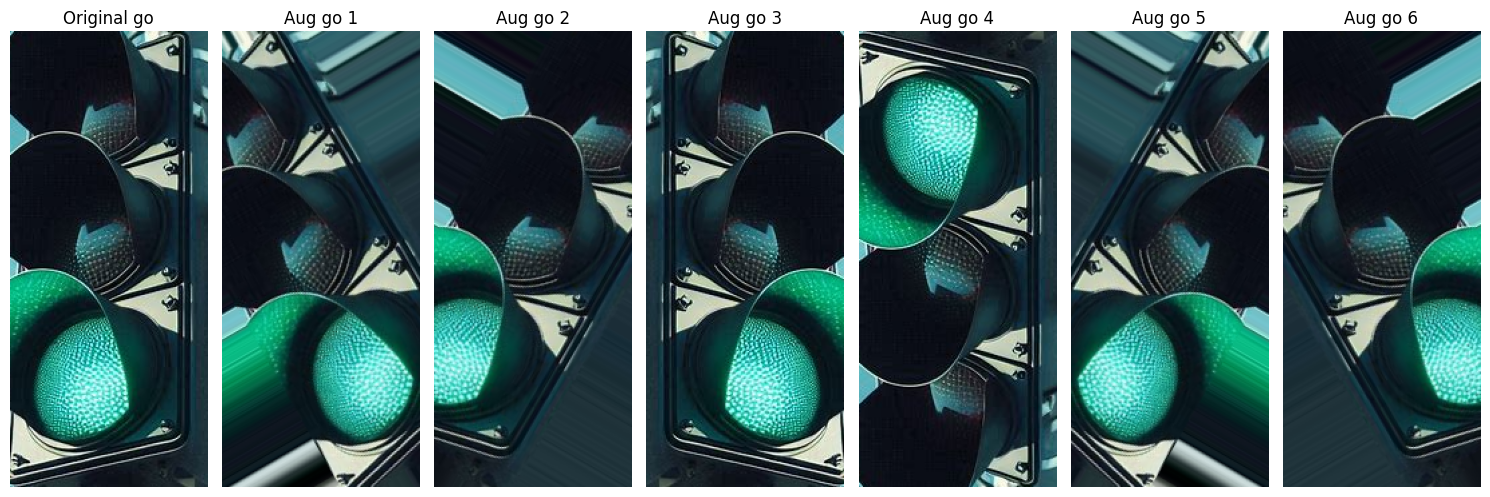

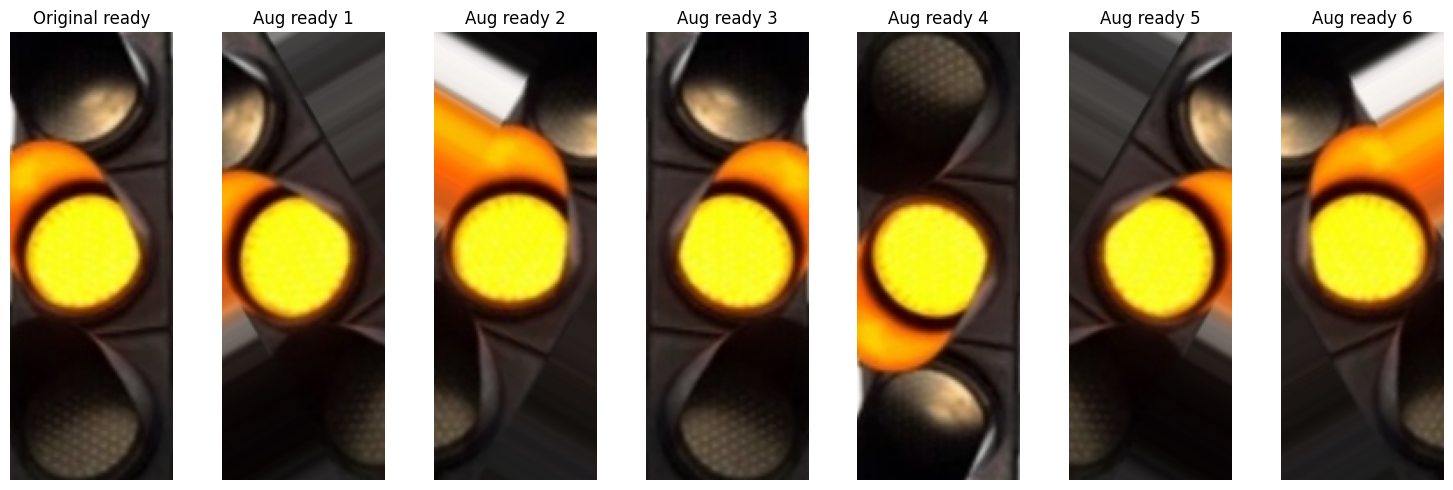

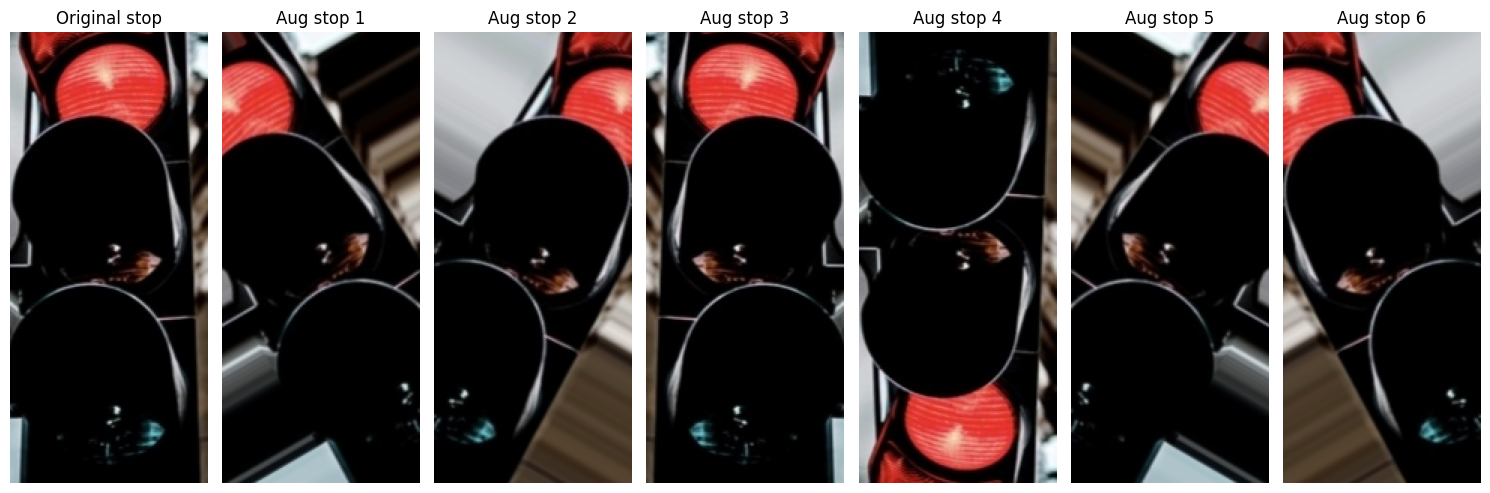

In [3]:
# Function untuk augmentasi gambar
def augment_image(image):
    height, width = image.shape[:2]
    augmented_images = []

    # Function untuk rotasi dan flip
    def rotate_image(image, angle):
        image_center = tuple(np.array(image.shape[1::-1]) / 2)
        rot_mat = cv2.getRotationMatrix2D(image_center, angle, 1.0)
        abs_cos = abs(rot_mat[0,0])
        abs_sin = abs(rot_mat[0,1])
        
        bound_w = int(height * abs_sin + width * abs_cos)
        bound_h = int(height * abs_cos + width * abs_sin)
        
        rot_mat[0, 2] += bound_w / 2 - image_center[0]
        rot_mat[1, 2] += bound_h / 2 - image_center[1]
        
        rotated_img = cv2.warpAffine(image, rot_mat, (bound_w, bound_h), borderMode=cv2.BORDER_REPLICATE)
        
        crop_x = (bound_w - width) // 2
        crop_y = (bound_h - height) // 2
        cropped_img = rotated_img[crop_y:crop_y + height, crop_x:crop_x + width]
        
        return cropped_img

    # Flipping function
    def flip_image(image, flip_code):
        return cv2.flip(image, flip_code)

    # melakukan augmentasi dan menambahkan ke list
    rotated1 = rotate_image(image, 30)
    augmented_images.append(rotated1)

    rotated2 = rotate_image(image, -30)
    augmented_images.append(rotated2)

    flipped_h = flip_image(image, 1)
    augmented_images.append(flipped_h)

    flipped_v = flip_image(image, 0)
    augmented_images.append(flipped_v)

    rotated_flipped1 = flip_image(rotated1, 1)
    augmented_images.append(rotated_flipped1)

    rotated_flipped2 = flip_image(rotated2, 1)
    augmented_images.append(rotated_flipped2)

    return augmented_images

# Augmentasi data
augmented_images = []
for image, label in all_images:
    augmented_images.extend([(aug_image, label) for aug_image in augment_image(image)])

all_images_augmented = all_images + augmented_images

# menampilkan sampel augmentasi images
def displayAugmentedSamples(images):
    unique_labels = np.unique([label for _, label in images])

    for label in unique_labels:
        sample_images = [image for image, lbl in images if lbl == label][:6]
        augmented_sample_images = [image for image, lbl in augmented_images if lbl == label][:6]
        
        plt.figure(figsize=(15, 5))
        plt.subplot(1, 7, 1)
        plt.imshow(cv2.cvtColor(sample_images[0], cv2.COLOR_BGR2RGB))
        plt.title(f'Original {label}')
        plt.axis('off')

        for i, aug_img in enumerate(augmented_sample_images):
            plt.subplot(1, 7, i+2)
            plt.imshow(cv2.cvtColor(aug_img, cv2.COLOR_BGR2RGB))
            plt.title(f'Aug {label} {i+1}')
            plt.axis('off')

        plt.tight_layout()
        plt.show()

displayAugmentedSamples(all_images_augmented)

## PROCESSING

### RESIZE

In [4]:
# Image Processing: Resize
def resize(images):
    images_resize = []
    for image, label in images:
        image_resize = cv2.resize(image, (100, 200))
        images_resize.append((image_resize, label))
    return images_resize

images_resize = resize(all_images_augmented)

Fungsi ini digunakan untuk mengubah ukuran semua gambar dalam dataset menjadi ukuran yang lebih kecil, yaitu 100 piksel lebar dan 200 piksel tinggi.
- **Cara Kerja:** Setiap gambar diambil dari `images`, kemudian diubah ukurannya menggunakan fungsi `cv2.resize`. Gambar yang sudah diubah ukurannya beserta labelnya dimasukkan ke dalam list `images_resize` dan kemudian dikembalikan.


### NOISE REMOVAL

In [6]:
# Image Processing: Noise Removal
def noiseRemove(images):
    images_noise = []
    for image, label in images:
        image_noise = cv2.GaussianBlur(image, (5, 5), 0)
        images_noise.append((image_noise, label))
    return images_noise

images_noise = noiseRemove(images_resize)

Fungsi ini bertujuan untuk mengurangi noise pada gambar menggunakan Gaussian Blur.
- **Cara Kerja:** Setiap gambar diambil dari `images`, kemudian diterapkan Gaussian Blur dengan kernel ukuran (5, 5). Gambar yang sudah di-blur beserta labelnya dimasukkan ke dalam list `images_noise` dan dikembalikan.

### CONTRAST ENHANCMENT

In [7]:
# Image Processing: Contrast Enhancement
def contrast(images):
    images_contrast = []
    for image, label in images:
        image_lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
        lab_planes = cv2.split(image_lab)
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
        lab_planes = list(lab_planes)
        lab_planes[0] = clahe.apply(lab_planes[0])
        lab_planes = tuple(lab_planes)
        image_lab = cv2.merge(lab_planes)
        image_contrast = cv2.cvtColor(image_lab, cv2.COLOR_LAB2BGR)
        images_contrast.append((image_contrast, label))
    return images_contrast

images_contrast = contrast(images_noise)

Fungsi ini bertujuan untuk meningkatkan kontras gambar dengan menerapkan metode CLAHE (Contrast Limited Adaptive Histogram Equalization) pada kanal luminance (L) dalam model warna LAB.
- **Cara Kerja:** Setiap gambar diambil dari `images`, kemudian dikonversi ke model warna LAB. Kanal L dipisahkan dari model LAB dan diterapkan CLAHE untuk meningkatkan kontrasnya. Gambar yang sudah ditingkatkan kontras beserta labelnya dimasukkan ke dalam list `images_contrast` dan dikembalikan.

### SATURATION ENHANCMENT

In [8]:
# Image Processing: Saturation
def saturation(images):
    images_saturation = []
    for image, label in images:
        image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
        h, s, v = cv2.split(image_hsv)
        saturation_factor = 1.5
        s = np.clip(s.astype(np.float32) * saturation_factor, 0, 255)
        s = np.clip(s, 0, 255).astype(np.uint8)
        image_hsv = cv2.merge([h, s, v])
        image_saturated = cv2.cvtColor(image_hsv, cv2.COLOR_HSV2BGR)
        images_saturation.append((image_saturated, label))
    return images_saturation

images_saturation = saturation(images_contrast)

Fungsi ini bertujuan untuk meningkatkan saturasi gambar dengan mengalikan nilai kanal S (saturasi) dalam model warna HSV dengan faktor tertentu.
- **Cara Kerja:** Setiap gambar diambil dari `images`, kemudian dikonversi ke model warna HSV. Kanal S dikalikan dengan `saturation_factor` untuk meningkatkan saturasinya. Nilai kanal S yang sudah ditingkatkan beserta kanal H dan V dikombinasikan kembali untuk membentuk gambar yang sudah ditingkatkan saturasinya dalam model warna HSV. Gambar yang sudah ditingkatkan saturasinya beserta labelnya dimasukkan ke dalam list `images_saturation` dan dikembalikan.

### INTENSITY NORMALIZATION

In [9]:
# Image Processing: Intensity Normalization
def normalizeIntensity(images):
    images_normalized = []
    for image, label in images:
        image_lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
        l_channel, a_channel, b_channel = cv2.split(image_lab)
        l_channel = cv2.normalize(l_channel, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)
        image_lab = cv2.merge([l_channel, a_channel, b_channel])
        image_normalized = cv2.cvtColor(image_lab, cv2.COLOR_LAB2BGR)
        images_normalized.append((image_normalized, label))
    return images_normalized

images_intensity_normalized = normalizeIntensity(images_saturation)

Fungsi ini bertujuan untuk menormalkan intensitas gambar dengan memastikan nilai kanal L (luminance) dalam model warna LAB berada dalam rentang 0-255.
- **Cara Kerja:** Setiap gambar diambil dari `images`, kemudian dikonversi ke model warna LAB. Kanal L dinormalisasi menggunakan `cv2.normalize` agar nilainya berada dalam rentang 0 hingga 255. Gambar yang sudah dinormalisasi intensitasnya beserta labelnya dimasukkan ke dalam list `images_normalized` dan dikembalikan.

### COLOR SEGMENTATION

In [10]:
# Image Processing: Color Segmentation
def segmentation(images):
    images_segment = []
    for image, label in images:
        image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
        lower_red = np.array([0, 100, 20])
        upper_red = np.array([179, 255, 255])
        mask_red = cv2.inRange(image_hsv, lower_red, upper_red)
        lower_green = np.array([50, 100, 100])
        upper_green = np.array([70, 255, 255])
        mask_green = cv2.inRange(image_hsv, lower_green, upper_green)
        lower_yellow = np.array([20, 100, 100])
        upper_yellow = np.array([30, 255, 255])
        mask_yellow = cv2.inRange(image_hsv, lower_yellow, upper_yellow)
        mask = mask_red + mask_green + mask_yellow
        image_segment = cv2.bitwise_and(image, image, mask=mask)
        images_segment.append((image_segment, label))
    return images_segment

images_segment = segmentation(images_intensity_normalized)

Fungsi ini digunakan untuk melakukan segmentasi warna pada gambar, khususnya untuk memisahkan area-area yang mewakili lampu lalu lintas berwarna merah, hijau, dan kuning.
- **Cara Kerja:** Setiap gambar diambil dari `images`, kemudian dikonversi ke model warna HSV. Dilakukan penggunaan tiga rentang warna (merah, hijau, kuning) dengan batas bawah dan atas yang sudah ditentukan. Masing-masing rentang menghasilkan sebuah mask yang digabungkan (operasi bitwise OR) untuk mendapatkan mask akhir. Gambar asli diterapkan dengan mask ini menggunakan operasi bitwise AND untuk memisahkan warna yang diinginkan. Gambar hasil segmentasi beserta labelnya dimasukkan ke dalam list `images_segment` dan dikembalikan.

## FEATURE EXTRACTION

In [11]:
# function ektraksi fitur
def extractFeatures(images):
    labels = {"stop": 0, "ready": 1, "go": 2}
    features = []
    target_labels = []

    for image, label in images:
        # Menghitung rata-rata warna
        avg_color = np.mean(image, axis=(0, 1))
        
        # Menghitung histogram warna
        hist_b = cv2.calcHist([image], [0], None, [256], [0, 256]).flatten()
        hist_g = cv2.calcHist([image], [1], None, [256], [0, 256]).flatten()
        hist_r = cv2.calcHist([image], [2], None, [256], [0, 256]).flatten()
        color_hist = np.concatenate((hist_b, hist_g, hist_r))

        # Menggabungkan rata-rata warna dan histogram warna
        feature_vector = np.concatenate((avg_color, color_hist))

        features.append(feature_vector)
        target_labels.append(labels[label])

    return np.array(features), np.array(target_labels)

# Menggunakan fungsi ekstraksi fitur yang diperbarui
features, target_labels = extractFeatures(images_segment)


Fungsi `extractFeatures` dalam kode tersebut digunakan untuk mengekstraksi fitur dari setiap gambar lampu lalu lintas yang disediakan dalam `images`. Tujuan utama dari proses ini adalah untuk mengubah setiap gambar menjadi representasi numerik yang dapat diproses oleh algoritma pembelajaran mesin untuk klasifikasi.

1. **Penggunaan Dictionary Label:**
   Pertama, fungsi ini menggunakan sebuah dictionary `labels` yang menghubungkan setiap label kategori (`stop`, `ready`, `go`) dengan nilai numerik (`0`, `1`, `2`). Hal ini memungkinkan untuk mengonversi label kategori menjadi format yang lebih mudah diproses oleh model pembelajaran mesin.

2. **Ekstraksi Fitur:**
   Setiap gambar diproses satu per satu:
   - **Rata-rata Warna (`avg_color`):** Menghitung nilai rata-rata intensitas warna untuk setiap saluran warna (biru, hijau, merah). Ini dilakukan dengan menggunakan `np.mean(image, axis=(0, 1))`, di mana `image` adalah gambar dalam bentuk array NumPy.
   
   - **Histogram Warna (`color_hist`):** Menghitung distribusi frekuensi intensitas warna untuk setiap saluran warna menggunakan `cv2.calcHist`. Hasil dari masing-masing saluran warna (biru, hijau, merah) di-flatten menjadi array satu dimensi dan kemudian digabungkan menjadi satu vektor menggunakan `np.concatenate`.

   - **Gabungan Fitur (`feature_vector`):** Setelah mendapatkan `avg_color` dan `color_hist`, keduanya digabungkan menjadi satu vektor fitur menggunakan `np.concatenate`. Vektor fitur inilah yang mewakili gambar sebagai input untuk proses pembelajaran mesin.

3. **Penyusunan Data Fitur dan Label:**
   Setiap `feature_vector` dan label numerik yang sesuai (`target_labels`) ditambahkan ke list `features` dan `target_labels` secara berurutan.

4. **Output:**
   - **Features (`features`):** Merupakan array NumPy yang berisi semua vektor fitur dari gambar-gambar yang telah diekstraksi.
   - **Target Labels (`target_labels`):** Merupakan array NumPy yang berisi label numerik yang sesuai dengan setiap vektor fitur dalam `features`, yang digunakan sebagai target atau output yang diharapkan saat melatih model.

Fungsi ini memungkinkan untuk mengubah gambar dalam format visual menjadi representasi numerik yang menggambarkan karakteristik penting dari gambar tersebut, seperti rata-rata warna dan distribusi histogram warna. Dengan data fitur ini, model seperti KNN, Random Forest, atau SVM dapat dilatih untuk mengenali dan mengklasifikasikan gambar-gambar tersebut berdasarkan ciri-ciri yang diekstraksi.

## SPLITTING DATA

In [12]:
# Splitting Data
def splitData(features, target_labels):
    X_train, X_test, y_train, y_test = train_test_split(features, target_labels, test_size=0.1, random_state=42)
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = splitData(features, target_labels)

Kode digunakan untuk membagi data menjadi dua subset yang berbeda: data pelatihan (`X_train` dan `y_train`) dan data pengujian (`X_test` dan `y_test`). Pemisahan ini penting dalam konteks klasifikasi lampu lalu lintas untuk menguji kinerja model sebelum diterapkan pada data yang belum pernah dilihatnya. 

Proses dimulai dengan fungsi `splitData`, yang mengambil dua parameter: `features` (fitur dari data yang ingin kita latih) dan `target_labels` (label yang sesuai dengan setiap fitur). Dalam implementasinya, `train_test_split` dari `sklearn.model_selection` digunakan untuk memisahkan data menjadi dua subset berdasarkan parameter berikut:

- `features`: Ini mencakup semua fitur atau atribut dari data, seperti vektor gambar yang sudah di-flatten atau telah diolah menjadi fitur-fitur numerik yang relevan untuk klasifikasi.
- `target_labels`: Ini adalah label yang sesuai dengan setiap fitur atau gambar, yang menunjukkan kategori atau kelas dari setiap contoh data, misalnya 'stop', 'ready', atau 'go' dalam konteks lampu lalu lintas.

`test_size=0.1` menentukan bahwa 10% dari data akan dialokasikan untuk pengujian, sementara 90% akan digunakan untuk pelatihan model. Pengaturan ini dapat disesuaikan tergantung pada ukuran data dan kebutuhan spesifik proyek.

`random_state=42` digunakan untuk memastikan reproduktibilitas hasil, sehingga hasil pengacakan untuk pembagian data akan sama setiap kali kode dijalankan, asalkan data masukan dan parameter lainnya tetap tidak berubah.

Setelah pemanggilan `splitData(features, target_labels)`, hasilnya adalah empat variabel:
- `X_train`: Subset dari fitur yang akan digunakan untuk melatih model.
- `X_test`: Subset dari fitur yang akan digunakan untuk menguji model.
- `y_train`: Subset dari label yang sesuai dengan `X_train`, digunakan untuk melatih model.
- `y_test`: Subset dari label yang sesuai dengan `X_test`, digunakan untuk menguji model.

## NORMALIZATION

In [13]:
# Normalization
def normalizeData(X_train, X_test):
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    return X_train, X_test, scaler

X_train, X_test, scaler = normalizeData(X_train, X_test)

Fungsi `normalizeData` bertujuan untuk menormalkan atau standarisasi fitur-fitur dalam data gambar yang digunakan sebagai masukan untuk setiap model klasifikasi. Dalam konteks ini, `StandardScaler` dari pustaka `sklearn.preprocessing` digunakan untuk melakukan normalisasi. Proses normalisasi ini bekerja dengan menghilangkan mean dari setiap fitur dan menskalakan varian sehingga setiap fitur memiliki skala yang serupa. Hal ini penting karena dalam klasifikasi gambar lampu lalu lintas, setiap fitur (misalnya intensitas piksel) harus memiliki skala yang serupa untuk memastikan bahwa perbedaan dalam fitur-fitur ini dapat memberikan kontribusi yang seimbang terhadap keputusan klasifikasi. Dengan demikian, proses ini membantu memperbaiki kualitas dan konsistensi data sebelum dipelajari oleh model pembelajaran mesin seperti KNN, Random Forest, atau SVM. Setelah normalisasi selesai, data yang sudah dinormalisasi (`X_train` dan `X_test`) serta objek `scaler` yang digunakan untuk normalisasi dapat digunakan dalam proses pelatihan dan evaluasi model klasifikasi untuk memastikan model dapat belajar dengan baik dari data yang dataset yang digunakan.

## MODELING

In [14]:
# K-Nearest Neighbors Model
def trainKNN(X_train, y_train):
    model_knn = KNeighborsClassifier(n_neighbors=3)
    model_knn.fit(X_train, y_train)
    return model_knn


Fungsi `trainKNN` di atas digunakan untuk melatih model K-Nearest Neighbors (KNN) dalam konteks klasifikasi lampu lalu lintas berdasarkan kode yang diberikan sebelumnya. KNN adalah algoritma pembelajaran mesin yang termasuk dalam kategori pembelajaran berbasis instance atau instance-based learning. Prinsip kerja KNN sangat sederhana: untuk memprediksi kategori label dari suatu data baru, algoritma KNN mencari kategori label dari k titik data terdekat yang ada di sekitarnya, di mana k adalah jumlah tetangga terdekat yang didefinisikan sebelumnya.

Dalam konteks klasifikasi lampu lalu lintas, setelah data gambar lampu lalu lintas diolah dan dipersiapkan (seperti yang dijelaskan dalam kode sebelumnya), fitur-fitur dari setiap gambar direpresentasikan sebagai vektor numerik yang disiapkan untuk pelatihan (`X_train`) dan label-label yang sesuai (`y_train`). Fungsi `trainKNN` ini menerima `X_train` (array dari fitur-fitur gambar) dan `y_train` (array dari label-label gambar) sebagai input.

Pada tahap ini, model KNN yang dibentuk memiliki parameter `n_neighbors=3`, yang berarti akan mencari 3 tetangga terdekat untuk setiap titik data yang baru untuk melakukan prediksi. Proses pelatihan model dilakukan dengan memasukkan `X_train` dan `y_train` ke dalam model menggunakan metode `.fit()` dari objek `model_knn`.

Hasil dari fungsi `trainKNN` adalah objek model KNN yang telah dilatih (`model_knn`), yang siap digunakan untuk melakukan prediksi pada data baru. Dengan demikian, fungsi ini memberikan inti dari proses pembentukan model KNN untuk klasifikasi gambar lampu lalu lintas berdasarkan fitur-fitur yang diambil dari gambar tersebut.

In [15]:
# Random Forest Model
def trainRandomForest(X_train, y_train):
    model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
    model_rf.fit(X_train, y_train)
    return model_rf

Fungsi `trainRandomForest` dalam kode ini bertanggung jawab untuk melatih model klasifikasi Random Forest untuk memprediksi kategori lampu lalu lintas berdasarkan fitur-fitur yang diberikan dalam set pelatihan (`X_train`) dan labelnya (`y_train`). Random Forest adalah jenis algoritma ensemble yang membangun beberapa pohon keputusan selama pelatihan. Setiap pohon keputusan dibangun berdasarkan subset acak dari data pelatihan dan subset acak dari fitur. Proses pembangunan ini memungkinkan model untuk belajar dari variasi yang ada dalam data, membuatnya lebih toleran terhadap overfitting daripada pohon keputusan tunggal. Ketika datanya masuk ke dalam model yang dilatih (`model_rf`), setiap pohon dalam ensemble mengeluarkan prediksi, dan hasilnya diambil melalui proses voting atau rata-rata, tergantung pada apakah ini adalah masalah klasifikasi atau regresi. Dengan menggunakan `n_estimators=100`, kita membangun 100 pohon keputusan dalam ensemble, yang umumnya memberikan hasil yang lebih stabil dan generalisasi yang baik untuk berbagai jenis data. Penggunaan `random_state=42` memastikan bahwa hasil yang dihasilkan dapat direproduksi secara konsisten dengan set seed tertentu, sehingga memudahkan dalam validasi dan tuning model. Dengan mengembalikan `model_rf`, fungsi ini memungkinkan model yang dilatih siap untuk digunakan dalam tahap prediksi pada data baru.

In [16]:
# Support Vector Machine Model
def trainSVM(X_train, y_train):
    model_svm = SVC(kernel='linear', random_state=42)
    model_svm.fit(X_train, y_train)
    return model_svm


Fungsi `trainSVM` ini bertanggung jawab untuk melatih model Support Vector Machine (SVM) dalam konteks klasifikasi lampu lalu lintas. SVM adalah algoritma pembelajaran yang digunakan untuk memisahkan dua kelas dengan mencari hyperplane terbaik yang memiliki margin terbesar di antara kelas-kelas tersebut. Dalam konteks ini, SVM digunakan dengan kernel linear (`kernel='linear'`), yang berarti algoritma akan mencoba untuk menarik garis lurus atau hyperplane di antara data pelatihan untuk memisahkan kelas lampu lalu lintas yang berbeda (seperti `stop`, `ready`, dan `go`). 

Proses latihan model dimulai dengan memanggil fungsi `SVC()` dari pustaka scikit-learn dengan parameter kernel linear. Kemudian, model di-fit (`fit`) ke data pelatihan (`X_train` dan `y_train`). Di sini, `X_train` adalah matriks fitur yang berisi data pelatihan yang telah diproses dan disiapkan sebelumnya, sedangkan `y_train` adalah array label yang sesuai dengan data pelatihan.

Setelah melatih model, model SVM yang telah dilatih dikembalikan (`return model_svm`) untuk digunakan dalam tahap evaluasi atau prediksi selanjutnya. Model SVM yang telah dilatih ini kemudian dapat digunakan untuk memprediksi kelas dari data uji yang baru, dan hasilnya dapat dievaluasi untuk mengukur seberapa baik model ini memisahkan dan mengklasifikasikan gambar lampu lalu lintas berdasarkan data pelatihan yang telah diberikan.

In [17]:
# Train all models
model_knn = trainKNN(X_train, y_train)
model_rf = trainRandomForest(X_train, y_train)
model_svm = trainSVM(X_train, y_train)

Kode ini bertujuan untuk melatih tiga model klasifikasi yang berbeda untuk mengenali dan membedakan berbagai warna lampu lalu lintas: KNN (K-Nearest Neighbors), Random Forest, dan SVM (Support Vector Machine). 

Pertama, kode mengambil data pelatihan `X_train` dan labelnya `y_train`, kemudian melatih masing-masing model dengan data ini menggunakan fungsi `trainKNN`, `trainRandomForest`, dan `trainSVM`. 

Setelah pelatihan, setiap model disiapkan untuk digunakan dengan memanggil `model_knn.predict(X_test)`, `model_rf.predict(X_test)`, dan `model_svm.predict(X_test)` untuk menghasilkan prediksi berdasarkan data uji `X_test`. Hasil prediksi ini kemudian dapat dievaluasi untuk membandingkan performa relatif dari masing-masing model dalam memprediksi warna lampu lalu lintas dari gambar yang belum pernah mereka lihat sebelumnya. Dengan demikian, setelah pelatihan, model-model ini siap digunakan untuk klasifikasi lampu lalu lintas berdasarkan fitur-fitur yang telah dipelajari dari data pelatihan.

##  TESTING

In [18]:
# Full Image Processing
def Processing(images):
    images_resize = resize(images)
    images_noise = noiseRemove(images_resize)
    images_contrast = contrast(images_noise)
    images_saturation = saturation(images_contrast)
    images_normalized = normalizeIntensity(images_saturation)
    images_segment = segmentation(images_normalized)
    return images_segment


kode di atas digunakan untuk menyatukan seluruh processing resize(images), noiseRemove(images), contrast(images), saturation(images), normalizeIntensity(images), segmentation(images) pada tahap sebelumnya dengan parameter `images` sebagai inputan

In [19]:
# function prediksi warna
def prediction(images, model, scaler):
    predictions = []
    for image in images:
        # Ekstraksi fitur
        avg_color = np.mean(image, axis=(0, 1))
        hist_b = cv2.calcHist([image], [0], None, [256], [0, 256]).flatten()
        hist_g = cv2.calcHist([image], [1], None, [256], [0, 256]).flatten()
        hist_r = cv2.calcHist([image], [2], None, [256], [0, 256]).flatten()
        color_hist = np.concatenate((hist_b, hist_g, hist_r))
        
        # Gabungkan fitur-fitur
        feature_vector = np.concatenate((avg_color, color_hist))
        
        # Normalisasi fitur
        scaled_features = scaler.transform([feature_vector])
        
        # Prediksi dengan model
        predicted_label = model.predict(scaled_features)
        
        # Konversi label menjadi nama warna di wakilkan stp = merah, ready = kuninng, go = hijau
        if predicted_label[0] == 0:
            predictions.append("stop")
        elif predicted_label[0] == 1:
            predictions.append("ready")
        elif predicted_label[0] == 2:
            predictions.append("go")
        else:
            predictions.append("unknown")
    
    return predictions


Fungsi `prediction` digunakan untuk melakukan prediksi terhadap gambar-gambar lampu lalu lintas menggunakan model yang telah dilatih sebelumnya. Prosesnya dimulai dengan ekstraksi fitur dari setiap gambar, di mana fitur-fitur yang diekstraksi meliputi rata-rata warna dan histogram warna untuk kanal biru (B), hijau (G), dan merah (R). Rata-rata warna digunakan untuk mendapatkan informasi tentang kecenderungan warna keseluruhan gambar, sementara histogram warna menggambarkan distribusi intensitas piksel di setiap kanal warna.

Setelah ekstraksi fitur, fitur-fitur tersebut digabungkan menjadi vektor fitur tunggal yang dikenal sebagai `feature_vector`. Langkah selanjutnya adalah normalisasi fitur menggunakan skaler yang telah dipersiapkan sebelumnya (`scaler.transform([feature_vector])`). Normalisasi ini penting untuk memastikan bahwa semua fitur berada dalam skala yang sama seperti saat model dilatih.

Setelah fitur-fitur dinormalisasi, model klasifikasi (seperti KNN, Random Forest, atau SVM) digunakan untuk melakukan prediksi. Model akan mengeluarkan label prediksi berdasarkan vektor fitur yang dinormalisasi. Hasil prediksi berupa angka (0 untuk "stop", 1 untuk "ready", dan 2 untuk "go").

Langkah terakhir adalah mengonversi label prediksi (angka) menjadi nama warna yang sesuai, yaitu "stop" untuk label 0, "ready" untuk label 1, dan "go" untuk label 2. Jika model gagal memprediksi dengan kepastian, misalnya jika label prediksi tidak sesuai dengan yang diharapkan (0, 1, atau 2), maka fungsi ini akan mengembalikan "unknown".

In [26]:
# Random Image Selection for Validation
def randi():
    folder = ["stop", "ready", "go"]
    real_color = []
    random_images = []
    for i in range(50):  # 
        folder_rand = random.choice(folder)
        real_color.append(folder_rand)
        path = f"dataset_kelompok_1/testing/{folder_rand}/"
        random_image = random.choice(os.listdir(path))
        random_image_path = os.path.join(path, random_image)
        random_image = cv2.imread(random_image_path)
        random_images.append((random_image, folder_rand))
    return random_images, real_color

random_images, real_color = randi()
random_images_processed = Processing(random_images)


Kode ini berfungsi untuk memilih secara acak gambar dari setiap kategori lampu lalu lintas ("stop", "ready", "go") untuk keperluan validasi. Proses dimulai dengan menginisialisasi daftar folder yang berisi kategori-kategori tersebut. Selanjutnya, dalam loop iterasi sebanyak 50 kali (sesuai dengan jumlah gambar yang dipilih), kode akan secara acak memilih satu folder dari daftar folder yang tersedia. Folder ini akan ditambahkan ke dalam daftar `real_color` untuk menyimpan kategori sebenarnya dari gambar yang dipilih. Kemudian, path ke folder yang sesuai digunakan untuk memilih satu gambar secara acak menggunakan `random.choice(os.listdir(path))`. Gambar yang dipilih kemudian dimuat menggunakan OpenCV (`cv2.imread`) dan ditambahkan bersama dengan label kategori ke dalam daftar `random_images`.

Setelah gambar-gambar acak berhasil dipilih, langkah selanjutnya adalah memproses gambar-gambar ini menggunakan fungsi atau prosedur `Processing`. Detail dari proses `Processing` ini tidak terlihat dalam kode yang diberikan, namun pada umumnya, dalam konteks klasifikasi lampu lalu lintas, proses ini mungkin termasuk dalam langkah-langkah seperti pra-pemrosesan gambar (seperti resizing, normalisasi, dan augmentasi), ekstraksi fitur, atau persiapan data lainnya sebelum digunakan untuk evaluasi atau validasi model.

Secara keseluruhan, kode ini bertujuan untuk mempersiapkan gambar-gambar dari dataset validasi secara acak untuk menguji performa model klasifikasi lampu lalu lintas yang telah dilatih sebelumnya.

Kode ini digunakan untuk melakukan prediksi warna lampu lalu lintas menggunakan model klasifikasi yang telah dilatih sebelumnya (KNN, Random Forest, dan SVM). Prosesnya dimulai dengan memanggil fungsi `prediction` untuk setiap model (`model_knn`, `model_rf`, dan `model_svm`) dengan memasukkan gambar-gambar yang telah diproses sebelumnya (`random_images_processed`). 

Pertama, gambar-gambar tersebut diproses menggunakan skala yang sama seperti yang digunakan saat melatih model (`scaler`). Kemudian, hasil prediksi dari setiap model disimpan dalam variabel `predicted_color_knn`, `predicted_color_rf`, dan `predicted_color_svm`.

Selanjutnya, hasil prediksi ini disusun ke dalam sebuah DataFrame menggunakan `pd.DataFrame`. DataFrame ini terdiri dari empat kolom: "Real Color" (warna sesungguhnya dari gambar-gambar tersebut), "KNN Predicted Color" (prediksi warna menggunakan model KNN), "RF Predicted Color" (prediksi warna menggunakan model Random Forest), dan "SVM Predicted Color" (prediksi warna menggunakan model SVM).

Tujuan utama dari kode ini adalah untuk membandingkan bagaimana setiap model mengklasifikasikan warna lampu lalu lintas berdasarkan gambar-gambar yang diberikan. DataFrame hasil prediksi ini dapat digunakan untuk evaluasi lebih lanjut terhadap performa setiap model dalam tugas klasifikasi lampu lalu lintas. Misalnya, dengan membandingkan "Real Color" dengan "KNN Predicted Color", "RF Predicted Color", dan "SVM Predicted Color", sehingga dapat dilihat seberapa baik setiap model mampu memprediksi warna yang benar.

In [27]:
predicted_color_knn = prediction([img for img, _ in random_images_processed], model_knn, scaler)
predicted_color_rf = prediction([img for img, _ in random_images_processed], model_rf, scaler)
predicted_color_svm = prediction([img for img, _ in random_images_processed], model_svm, scaler)

#buat DataFrame hasil prediksi
df_predictions = pd.DataFrame({
    "Real Color": real_color,
    "KNN Predicted Color": predicted_color_knn,
    "RF Predicted Color": predicted_color_rf,
    "SVM Predicted Color": predicted_color_svm
})
print("Predictions DataFrame:")
df_predictions

Predictions DataFrame:


,Real Color,KNN Predicted Color,RF Predicted Color,SVM Predicted Color
0,stop,stop,stop,stop
1,stop,stop,stop,stop
2,ready,ready,ready,ready
3,ready,ready,ready,ready
4,go,go,go,go
5,ready,ready,ready,ready
6,stop,stop,stop,stop
7,stop,stop,stop,stop
8,ready,ready,ready,ready
9,stop,stop,stop,stop


## EVALUATION

Kode inidigunakan untuk mengevaluasi tiga model klasifikasi yang telah dilatih untuk memprediksi warna lampu lalu lintas: KNN (K-Nearest Neighbors), Random Forest, dan SVM (Support Vector Machine). Setelah model-model tersebut melakukan prediksi terhadap data pengujian, evaluasi dilakukan menggunakan beberapa metrik kinerja klasifikasi, termasuk akurasi, presisi, recall, dan F1-score. 

Fungsi `evaluateModel` digunakan untuk menghitung semua metrik ini. Pertama, metrik-metrik ini dihitung menggunakan fungsi dari pustaka scikit-learn seperti `accuracy_score`, `precision_score`, `recall_score`, dan `f1_score`. Selain itu, juga dihitung matriks kebingungan (`confusion_matrix`) yang menunjukkan seberapa baik model dapat mengklasifikasikan setiap kategori (stop, ready, go) secara tepat.

Setelah evaluasi dilakukan untuk masing-masing model, hasilnya disimpan dalam variabel `df_metrics` yang merupakan objek DataFrame dari pustaka pandas. DataFrame ini memiliki empat kolom: "Model" untuk nama model, "Accuracy" untuk nilai akurasi, "Precision" untuk nilai presisi rata-rata tertimbang, "Recall" untuk nilai recall rata-rata tertimbang, dan "F1 Score" untuk nilai F1-score rata-rata tertimbang. Hasil evaluasi ini kemudian dicetak untuk memberikan gambaran komprehensif tentang performa relatif dari masing-masing model dalam tugas klasifikasi lampu lalu lintas.

Metrik-metrik ini memberikan insight yang penting tentang seberapa baik model dapat mengenali dan membedakan antara berbagai warna lampu lalu lintas, yang merupakan tujuan utama dari analisis klasifikasi ini. 

In [28]:
# Function evaluasi
def evaluateModel(real_color, predicted_color):
    accuracy = accuracy_score(real_color, predicted_color)
    precision = precision_score(real_color, predicted_color, average='weighted')
    recall = recall_score(real_color, predicted_color, average='weighted')
    f1 = f1_score(real_color, predicted_color, average='weighted')
    cm = confusion_matrix(real_color, predicted_color, labels=["stop", "ready", "go"])

    return accuracy, precision, recall, f1, cm

# evaluasi setiap model
accuracy_knn, precision_knn, recall_knn, f1_knn, cm_knn = evaluateModel(real_color, predicted_color_knn)
accuracy_rf, precision_rf, recall_rf, f1_rf, cm_rf = evaluateModel(real_color, predicted_color_rf)
accuracy_svm, precision_svm, recall_svm, f1_svm, cm_svm = evaluateModel(real_color, predicted_color_svm)

# buat DataFrame untuk evaluasi matriks
df_metrics = pd.DataFrame({
    "Model": ["KNN", "Random Forest", "SVM"],
    "Accuracy": [accuracy_knn, accuracy_rf, accuracy_svm],
    "Precision": [precision_knn, precision_rf, precision_svm],
    "Recall": [recall_knn, recall_rf, recall_svm],
    "F1 Score": [f1_knn, f1_rf, f1_svm]
})
print("Evaluation Metrics DataFrame:")
df_metrics

Evaluation Metrics DataFrame:


,Model,Accuracy,Precision,Recall,F1 Score
0,KNN,1.0,1.0,1.0,1.0
1,Random Forest,1.0,1.0,1.0,1.0
2,SVM,1.0,1.0,1.0,1.0


Fungsi `plotConfusionMatrices` ini digunakan untuk menampilkan matriks kebingungan (confusion matrix) dari tiga model klasifikasi yang berbeda secara berdampingan, yaitu KNN (K-Nearest Neighbors), Random Forest, dan SVM (Support Vector Machine). Matriks kebingungan adalah alat evaluasi yang penting dalam tugas klasifikasi seperti ini, karena memperlihatkan seberapa baik model memprediksi kelas yang benar (true positive, true negative) dan seberapa sering model salah dalam prediksi kelas (false positive, false negative).

Pada fungsi ini, setiap matriks kebingungan (cm_knn, cm_rf, cm_svm) disertakan sebagai parameter. Matriks ini berisi nilai prediksi yang dilakukan oleh masing-masing model terhadap data uji, dibandingkan dengan nilai sebenarnya dari data uji. Setiap matriks diatur dengan menggunakan seaborn untuk menghasilkan plot heatmap yang lebih mudah dibaca, di mana nilai di setiap sel matriks direpresentasikan oleh warna yang berbeda-beda sesuai dengan nilai numeriknya. Anotasi (annot=True) menambahkan nilai aktual di setiap sel matriks untuk memberikan konteks tambahan.

Fungsi ini mengatur tiga subplot secara horizontal dengan menggunakan `subplots(1, 3, figsize=(18, 6))`, yang menghasilkan satu baris dengan tiga kolom. Setiap subplot memvisualisasikan matriks kebingungan untuk masing-masing model: KNN, Random Forest, dan SVM. Parameter `title1`, `title2`, dan `title3` digunakan untuk memberikan judul untuk setiap subplot yang sesuai dengan nama modelnya.

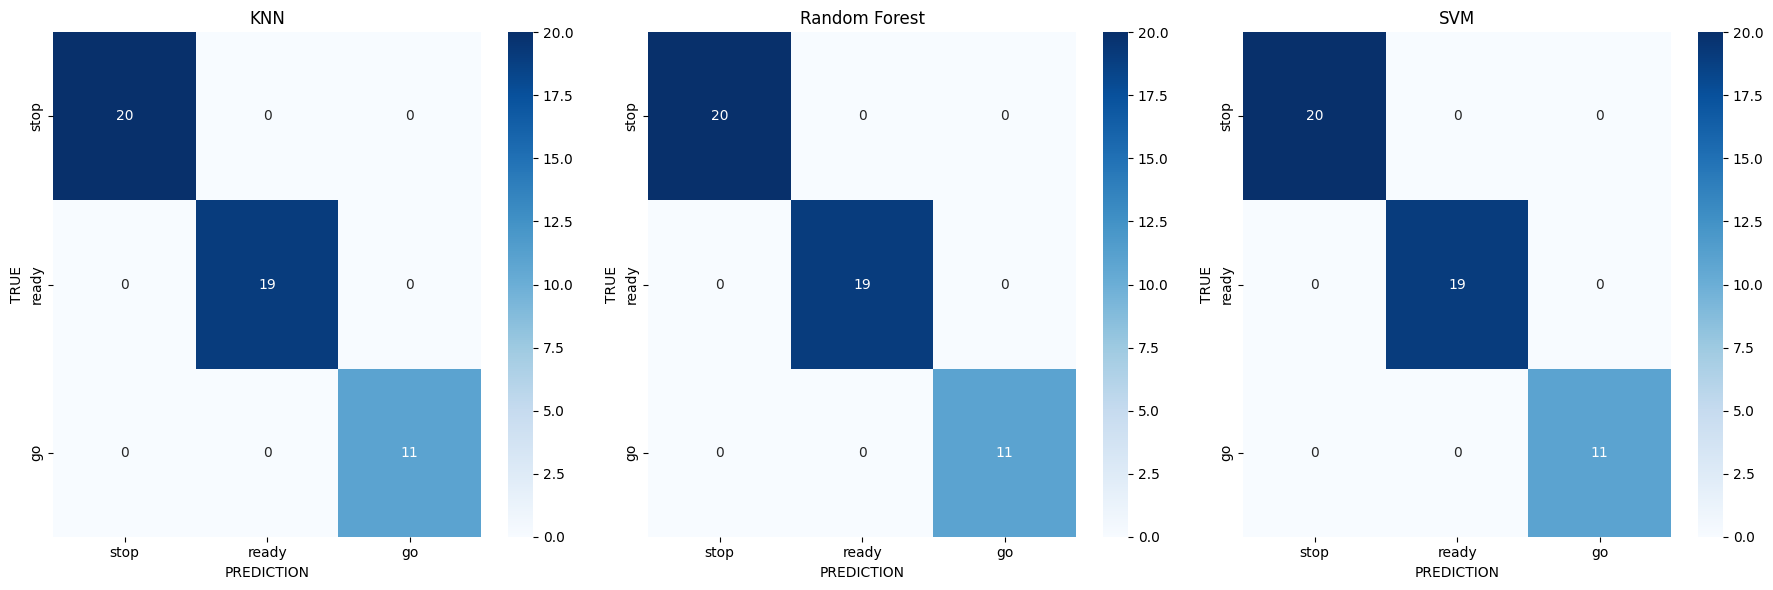

In [30]:
# Plot confusion matrices side-by-side
def plotConfusionMatrices(cm_knn, cm_rf, cm_svm, title1, title2, title3):
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    
    sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', xticklabels=["stop", "ready", "go"], yticklabels=["stop", "ready", "go"], ax=axes[0])
    axes[0].set_title(title1)
    axes[0].set_xlabel('PREDICTION')
    axes[0].set_ylabel('TRUE')
    
    sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=["stop", "ready", "go"], yticklabels=["stop", "ready", "go"], ax=axes[1])
    axes[1].set_title(title2)
    axes[1].set_xlabel('PREDICTION')
    axes[1].set_ylabel('TRUE')
    
    sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', xticklabels=["stop", "ready", "go"], yticklabels=["stop", "ready", "go"], ax=axes[2])
    axes[2].set_title(title3)
    axes[2].set_xlabel('PREDICTION')
    axes[2].set_ylabel('TRUE')
    
    plt.tight_layout()
    plt.show()

plotConfusionMatrices(cm_knn, cm_rf, cm_svm, "KNN", "Random Forest", "SVM")

### KESIMPULAN

Berdasarkan percobaan yang telah di lakukan setiap tahap mulai dari import library sampai dengan proses evaluation di temukan bahwa setiap kinerja model dalam program klasifikasi lampu lalu lintas ini sebelum processing akurasi yang di berikan masih relatif rendah dan sesudah di lakukan tahap processing memberikan hasil yang sempurna atau baik sehingga penggunaan setiap model baik itu KNN, Random Forest maupun SVm dapat di terapkan pada program ini dengan penggunaan processing yang tepat pada dataset untuk menghasilkan program yang sesuai, di harapkan program ini juga dapat dikembangkan menjadi teknologi yang nyata sehingga dapat bermanfaat bagi lingkungan sekitar terutama kepada orang-orang yang menjadi latar belakang pembuatan program ini.